## This script runs the apoptosis model, generating data and plots for figure 1b

In [1]:
using Pkg
Pkg.add("IJulia")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
Precompiling project...
  ✓ LaTeXStrings
  ✓ ErrorfreeArithmetic
  ✓ Extents
  ✓ ProgressMeter
  ✓ RingLists
  ✓ Multisets
  ✓ RoundingEmulator
  ✓ AbstractLattices
  ✓ SetRounding
  ✓ Mods
  ✓ TupleTools
  ✓ PkgVersion
  ✓ Primes
  ✓ Permutations
  ✓ AxisArrays
  ✓ Automa
  ✓ Mustache
  ✓ Roots
  ✓ CRlibm_jll
  ✓ Unitful
  ✓ LightXML
  ✓ Polynomials
  ✓ PlotlyKaleido
  ✓ MLBase
  ✓ FreeType
  ✓ Clustering
  ✓ JpegTurbo
  ✓ Sixel
  ✓ PNGFiles
  ✓ SimpleRandom
  ✗ RCall
  ✓ Pango_jll
  ✓ LsqFit
  ✓ Latexify
  ✓ PlotlyBase
  ✓ FastRounding
  ✓ GeoInterface
  ✓ StableHashTraits
  ✓ PyPlot
  ✓ SimplePartitions
  ✓ ImageAxes
  ✓ Blink
  ✓ HypothesisTests
  ✓ CRlibm
  ✓ CurveFit
  ✓ TiffImages
  ✓ SimplePolynomials
  ✓ Cairo
  ✓ UnitfulLatexify
  ✓ DSP
  ✓ ImageMetadata
  ✓ PlotlyJS
  

In [1]:
using Pkg
Pkg.status()

      Status `~/.julia/environments/v1.7/Project.toml`
  [4fba245c] ArrayInterface v7.5.1
  [fbb218c0] BSON v0.3.7
  [336ed68f] CSV v0.10.11
  [13f3f980] CairoMakie v0.10.12
  [861a8166] Combinatorics v1.0.2
  [5a033b19] CurveFit v0.6.0
  [a93c6f00] DataFrames v1.3.6
  [2b5f629d] DiffEqBase v6.130.0
  [0c46a032] DifferentialEquations v7.2.0
  [31c24e10] Distributions v0.25.67
  [5789e2e9] FileIO v1.16.1
  [6a86dc24] FiniteDiff v2.21.1
  [38e38edf] GLM v1.8.3
  [28b8d3ca] GR v0.72.10
  [09f84164] HypothesisTests v0.10.13
  [7073ff75] IJulia v1.24.2
  [033835bb] JLD2 v0.4.38
  [b4fcebef] Lasso v0.7.1
  [2fda8390] LsqFit v0.15.0
  [442fdcdd] Measures v0.3.2
  [1dea7af3] OrdinaryDiffEq v6.52.0
  [58dd65bb] Plotly v0.4.1
  [a03496cd] PlotlyBase v0.8.19
  [f0f68f2c] PlotlyJS v0.18.11
  [f2990250] PlotlyKaleido v2.2.0
  [91a5bcdd] Plots v1.39.0
  [d330b81b] PyPlot v2.11.2
  [1a8c2f83] Query v1.0.0
  [102930c3] SmoothingSplines v0.3.1
  [860ef19b] StableRNGs v1.0.0
  [f3b207a7] StatsPlots v0.1

In [2]:
Pkg.add(Pkg.PackageSpec(;name="DataFrames", version="1.3.4"))
Pkg.add(Pkg.PackageSpec(;name="DifferentialEquations", version="7.2.0"))
Pkg.add(Pkg.PackageSpec(;name="Distributions", version="0.25.65"))
Pkg.add(Pkg.PackageSpec(;name="CSV", version="0.10.4"))
Pkg.add(Pkg.PackageSpec(;name="BSON", version="0.3.5"))
Pkg.add(Pkg.PackageSpec(;name="JLD2", version="0.4.22"))
Pkg.add(Pkg.PackageSpec(;name="FileIO", version="1.14.0"))
Pkg.add(Pkg.PackageSpec(;name="FiniteDiff", version="2.13.1"))
Pkg.add(Pkg.PackageSpec(;name="GR", version="0.66.0"))
Pkg.add(Pkg.PackageSpec(;name="IJulia", version="1.23.3"))
Pkg.add(Pkg.PackageSpec(;name="OrdinaryDiffEq", version="6.18.1"))
Pkg.add(Pkg.PackageSpec(;name="Plotly", version="0.4.1"))
Pkg.add(Pkg.PackageSpec(;name="PlotlyBase", version="0.8.18"))
Pkg.add(Pkg.PackageSpec(;name="PlotlyJS", version="0.18.8"))
Pkg.add(Pkg.PackageSpec(;name="Plots", version="1.31.2"))
Pkg.add(Pkg.PackageSpec(;name="SmoothingSplines", version="0.3.1"))
Pkg.add(Pkg.PackageSpec(;name="Sundials", version="4.9.4"))
Pkg.add(Pkg.PackageSpec(;name="Tables", version="1.7.0"))
Pkg.add(Pkg.PackageSpec(;name="TimerOutputs", version="0.5.20"))
Pkg.add(Pkg.PackageSpec(;name="WebIO", version="0.8.18"))


    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
   Installed ADTypes ─ v0.2.5
    Updating `~/.julia/environments/v1.6/Project.toml`
  [4fba245c] ↓ ArrayInterface v7.5.1 ⇒ v6.0.25
  [a93c6f00] ↓ DataFrames v1.3.6 ⇒ v1.3.4
  [2b5f629d] ↓ DiffEqBase v6.130.0 ⇒ v6.119.0
  [6a86dc24] ↓ FiniteDiff v2.21.1 ⇒ v2.17.0
  [1dea7af3] ↓ OrdinaryDiffEq v6.50.0 ⇒ v6.44.1
  [727e6d20] ↓ SimpleNonlinearSolve v0.1.23 ⇒ v0.1.14
  [789caeaf] ↓ StochasticDiffEq v6.60.0 ⇒ v6.58.0
  [c3572dad] ↓ Sundials v4.20.1 ⇒ v4.15.1
  [bd369af6] ↑ Tables v1.7.0 ⇒ v1.11.1
  [a759f4b9] ↑ TimerOutputs v0.5.20 ⇒ v0.5.23
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [47edcb42] ↑ ADTypes v0.2.4 ⇒ v0.2.5
  [4fba245c] ↓ ArrayInterface v7.5.1 ⇒ v6.0.25
  [6ba088a2] + ArrayInterfaceGPUArrays v0.2.2
  [015c0d05] + ArrayInterfaceOffsetArrays v0.1.7
  [b0d46f97] + ArrayInterfaceStaticArrays v0.1.5
  [dd5226c6] + ArrayInterfaceStaticArraysCore v0.1.4
  [fa961155] ↓ CEnum v0.5.0 ⇒ 

LoadError: Unsatisfiable requirements detected for package [38;5;3mWebIO [0f1e0344][39m:
 [38;5;3mWebIO [0f1e0344][39m log:
 ├─possible versions are: [38;5;3m0.2.5-0.8.21[39m or uninstalled
 └─restricted to versions [38;5;3m0.8.18[39m by an explicit requirement — no versions left

In [5]:
using Pkg
Pkg.add(Pkg.PackageSpec(;name="DifferentialEquations", version="7.2.0"))

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed PlotlyKaleido ──────────── v2.2.0
   Installed Multisets ──────────────── v0.4.4
   Installed GR_jll ─────────────────── v0.72.10+0
   Installed PNGFiles ───────────────── v0.4.1
   Installed JpegTurbo ──────────────── v0.1.4
   Installed Permutations ───────────── v0.4.18
   Installed RelocatableFolders ─────── v1.0.1
   Installed StableHashTraits ───────── v1.1.0
   Installed DSP ────────────────────── v0.7.9
   Installed PDMats ─────────────────── v0.11.28
   Installed TiffImages ─────────────── v0.6.8
   Installed ProgressMeter ──────────── v1.9.0
   Installed StaticArrays ───────────── v1.6.5
   Installed SetRounding ────────────── v0.2.1
   Installed Polyester ──────────────── v0.7.9
   Installed Xorg_libSM_jll ─────────── v1.2.3+0
   Installed TriangularSolve ────────── v0.1.20
   Installed MLBase ─────────────────── v0.9.2
   Installed RCall ──────────────────── v0.13.18
  

LoadError: Error building `RCall`: 
ERROR: LoadError: R_HOME is not a directory.
Stacktrace:
 [1] error(s::String)
   @ Base ./error.jl:33
 [2] top-level scope
   @ ~/.julia/packages/RCall/gOwEW/deps/build.jl:53
 [3] include(fname::String)
   @ Base.MainInclude ./client.jl:451
 [4] top-level scope
   @ none:5
in expression starting at /home/richard/.julia/packages/RCall/gOwEW/deps/build.jl:11

In [2]:
#packages we need
using Plots 
using CSV
using Distributions
using Random
using DataFrames
using JLD2
using DelimitedFiles
using FileIO
using Sundials
using DifferentialEquations

In [3]:
#set up where CSV2Julia is
locationOfCSV2Julia="csv2model-multiscale.py"

#identify the three CSV sheets that describe the model
reactionsFile="reactions_apoptosis.csv"
parametersFile="parameters_apoptosis.csv"
rateLawsFile="rateLaws_apoptosis.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile, "odeApoptosis.jl"]
cmd=`python3 $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

inline
Running CSV2JuliaDiffEq with parameters hard-coded into the CSV file, if this is not correct, re-run with the 5th argument set to 'scan' or 'param'
Opening rateLaws_apoptosis.csv as rate law file
Opening parameters_apoptosis.csv as parameters file
Opening reactions_apoptosis.csv as reactions file


Process(`python3 csv2model-multiscale.py reactions_apoptosis.csv parameters_apoptosis.csv rateLaws_apoptosis.csv odeApoptosis.jl`, ProcessExited(0))

In [4]:
include("fixSpecies.jl")
fixSpecies("odeApoptosis.jl","odeApoptosisFixed.jl",1)
odeFile=include("odeApoptosisFixed.jl")
include("variableNames.jl")

59-element Vector{String}:
 "L"
 "R"
 "L_R"
 "DISC"
 "flip"
 "flip_DISC"
 "pC8"
 "DISC_pC8"
 "C8"
 "BAR"
 "BAR_C8"
 "pC3"
 "pC3_C8"
 ⋮
 "ASmac"
 "cCytoC"
 "Apaf"
 "Apaf_cCytoC"
 "ApafStar"
 "Procasp9"
 "Apop"
 "Apop_pC3"
 "cSmac"
 "Apop_XIAP"
 "cSmac_XIAP"
 "Bcl2t"

In [5]:
## Files and variables required to solve
p=1
maxTimeSS=100000.0
maxTimeTC=144*60.0
params=1

1

In [6]:
global f=ODEFunction(odeFile,syms=Symbol.(syms))

(::ODEFunction{true, SciMLBase.FullSpecialize, typeof(odeApoptosis!), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Vector{Symbol}, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}) (generic function with 1 method)

In [7]:
## Bcl2t values:

# WT  = 277
# 1.5 = 415.5
# 2.0 = 554
# 2.5 = 692.5
# 3.0 = 831
# 3.5 = 969.5

# replace xxx with value for copy number

function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("L"),syms)]=0
   y0[findfirst(isequal("R"),syms)]=1000
   y0[findfirst(isequal("flip"),syms)]=2000
   y0[findfirst(isequal("pC8"),syms)]=10000
   y0[findfirst(isequal("BAR"),syms)]=1000
   y0[findfirst(isequal("pC3"),syms)]=10000
   y0[findfirst(isequal("pC6"),syms)]=10000
   y0[findfirst(isequal("XIAP"),syms)]=100000
   y0[findfirst(isequal("PARP"),syms)]=1000000
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Bcl2c"),syms)]=20000
   y0[findfirst(isequal("Bax"),syms)]=80000
   y0[findfirst(isequal("Bcl2"),syms)]=30000
   y0[findfirst(isequal("Mito"),syms)]=500000
   y0[findfirst(isequal("mCytoC"),syms)]=500000
   y0[findfirst(isequal("mSMac"),syms)]=100000
   y0[findfirst(isequal("Apaf"),syms)]=100000
   y0[findfirst(isequal("Procasp9"),syms)]=100000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=277
    return y0
end

initConditionsApop (generic function with 1 method)

### Steady state

In [8]:
function genSSconds(Bcl2)
    y0=zeros(length(syms))
    y0=initConditionsApop(y0,syms)
    y0[findfirst(isequal("L"),syms)]=0
    y0[findfirst(isequal("Bcl2t"),syms)]=277*Bcl2

    #solve the steady state
    prob=ODEProblem(f,y0,(0.0,maxTimeSS),abstol=1e-5,reltol=1e-3, maxiters=1e10)
    solss=solve(prob, Rosenbrock23(), saveat=maxTimeSS/1000)

    #dynamic phase, use SS solution as initial conditions
    y0_ss=vec(convert(Array, solss[:,end]))    
    y0_ss[findfirst(isequal("L"),syms)]=1

    # save y0 as csv
    writedlm("SS_conds/steady_state_"*string(Bcl2)*".csv", y0_ss, ',')
    println("steady state conditions for Bcl2 x"*string(Bcl2)*" saved")
end

genSSconds (generic function with 1 method)

In [9]:
#find cleaved parp
speciesToPlot="CPARP"
#find total PARP
denominator=["PARP","PARP_C3","CPARP"]
CPARPIndex=findfirst(isequal(speciesToPlot),syms)
denominatorIndexes=Array{Int64}(undef,length(denominator))
for i in 1:length(denominator)
    thisIndex=findfirst(isequal(denominator[i]),syms)
    denominatorIndexes[i]=convert(Int64,thisIndex)
end

In [10]:
## no multi-threading version

function solveCell(i)    
        
        y0_init = vec(readdlm("SS_conds/steady_state_"*string(i)*".csv"))
        prob=ODEProblem(f,y0_init,(0.0,maxTimeTC),abstol=1e-5,reltol=1e-3, maxiters=1e10)
        sol=solve(prob, Rosenbrock23(), saveat=1.0, progress = true)
        
        println(string(i)*" complete")
        return(sol)
end

solveCell (generic function with 1 method)

In [11]:
#now we'll actually solve the models

# Bcl2 x1.5 = Bcl2InhValue=0.666667

function solveSingle(mut)
            ## import init conditions
            y0_init = vec(readdlm("/"*mut_folder*"/steady_state_"*mut*".csv"))
 
            prob=ODEProblem(f,y0_init,(0.0,maxTimeTC),abstol=1e-5,reltol=1e-3,maxiters=1e10)
            sol=solve(prob,Rosenbrock23(),saveat=1.0,progress = true)
                  
            save("solutions/cell_"*mut*".jld2", "solution", sol)    
            return(sol)
end

solveSingle (generic function with 1 method)

In [12]:
function T2D_single(sol,mut)
        cParray=zeros(1,Int(maxTimeTC)+1)
        #sol = load("solutions/cell_"*string(mut)*".jld2", "solution")
        thisNumerator=sol[CPARPIndex,:] #cPARP
        thisDenominatorTCs=sol[denominatorIndexes,:]
        thisDenominator=sum(thisDenominatorTCs,dims=1) #other PARP species
        parpPercentage=thisNumerator./thisDenominator'
        return(parpPercentage)
end

T2D_single (generic function with 1 method)

In [13]:
muts=[1.0,1.5]

2-element Vector{Float64}:
 1.0
 1.5

In [14]:
function solvePlusT2D(mut_values)
    T2D_list=[]
    for i in muts
        genSSconds(i)
        sol = solveCell(i)
        PARPpc = T2D_single(sol,i)
        push!(T2D_list, PARPpc)
    end
    return(T2D_list)
end

solvePlusT2D (generic function with 1 method)

In [15]:
solPARPs = solvePlusT2D(muts)

steady state conditions for Bcl2 x1.0 saved
1.0 complete
steady state conditions for Bcl2 x1.5 saved
1.5 complete


2-element Vector{Any}:
 [0.0; 5.3212176328288025e-12; … ; 0.7997011261028888; 0.7997011998324742;;]
 [0.0; 5.3212176328283614e-12; … ; 0.7900496423521214; 0.7900497735563747;;]

### plot single

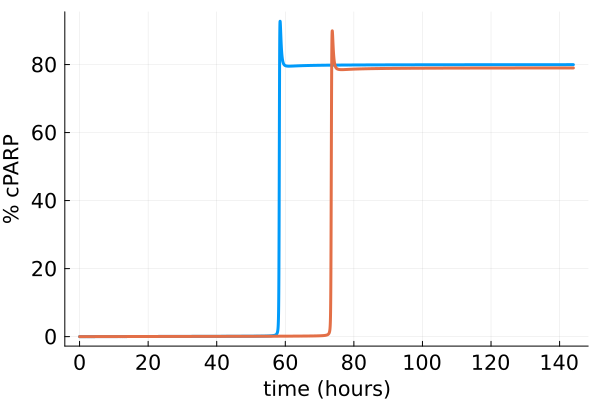

In [16]:
plot(solPARPs[1].*100,label="WT",linewidth=3, legend=false)
plot!(solPARPs[2].*100,label="Bcl2 x1.5",linewidth=3, legend=false)
s=string.(collect(0:20:150))
plot!(xticks = (0:(60*20):(60*150),s),xlabel="time (hours)",ylabel="% cPARP",fmt = :png,    
      xtickfontsize=14,
      ytickfontsize=14,
      xguidefontsize=14,
      yguidefontsize=14)

### Bcl2 mutations up to x100

In [15]:
mut_folder="Bcl2_mutations"

"Bcl2_mutations"

In [16]:
mkpath("starting_conds/"*mut_folder*"/")
mkpath("SS_conds/"*mut_folder*"/")
mkpath("solutions/"*mut_folder*"/")

"solutions/Bcl2_mutations"

In [17]:
Bcl2_muts = [1, 1.5, 2, 5, 10, 50, 100]

7-element Vector{Float64}:
   1.0
   1.5
   2.0
   5.0
  10.0
  50.0
 100.0

In [18]:
function calcT2D(sol, i)
    cParray=zeros(1,Int(maxTimeTC)+1)
    thisNumerator=sol[CPARPIndex,:] #cPARP
    thisDenominatorTCs=sol[denominatorIndexes,:]
    thisDenominator=sum(thisDenominatorTCs,dims=1) #other PARP species
    parpPercentage=thisNumerator./thisDenominator'
    cParray=[cParray;parpPercentage']
    if cParray[end] > 0.01
        T2Death = findfirst(x->x>0.01, cParray)            
        T2D_t = T2Death[2]
    else
        T2D_t = maxTimeTC
    end
        T2D_df = DataFrame(Mut="cell_"*string(i), T2D=T2D_t)
    return(T2D_df)
end

calcT2D (generic function with 1 method)

In [19]:
T2D_res = DataFrame(Mut=Any[],T2D=Float64[])
for i in Bcl2_muts
    genSSconds(i)
    sol = solveCell(i)
    T2Ddf = calcT2D(sol, i)
    T2D_res = append!(T2D_res, T2Ddf)
end

steady state conditions for Bcl2 x1.0 saved
1.0 complete
steady state conditions for Bcl2 x1.5 saved
1.5 complete
steady state conditions for Bcl2 x2.0 saved
2.0 complete
steady state conditions for Bcl2 x5.0 saved
5.0 complete
steady state conditions for Bcl2 x10.0 saved
10.0 complete
steady state conditions for Bcl2 x50.0 saved
50.0 complete
steady state conditions for Bcl2 x100.0 saved
100.0 complete


In [20]:
T2D_res = sort!(T2D_res, :T2D, rev=true)

,Mut,T2D
,Any,Float64
1,cell_10.0,8640.0
2,cell_50.0,8640.0
3,cell_100.0,8640.0
4,cell_5.0,6115.0
5,cell_2.0,4878.0
6,cell_1.5,4366.0
7,cell_1.0,3457.0


In [20]:
T2D_res = sort!(T2D_res, :T2D, rev=true)

,Mut,T2D
,Any,Float64
1,cell_10.0,8640.0
2,cell_50.0,8640.0
3,cell_100.0,8640.0
4,cell_5.0,6115.0
5,cell_2.0,4878.0
6,cell_1.5,4366.0
7,cell_1.0,3457.0


In [69]:
T2D_res = sort!(T2D_res, :T2D, rev=true)

,Mut,T2D
,Any,Float64
1,cell_10.0,8640.0
2,cell_50.0,8640.0
3,cell_100.0,8640.0
4,cell_5.0,6152.0
5,cell_2.0,4974.0
6,cell_1.5,4556.0
7,cell_1.0,3648.0


In [29]:
T2D_res = sort!(T2D_res, :T2D, rev=true)

,Mut,T2D
,Any,Float64
1,cell_10.0,8640.0
2,cell_50.0,8640.0
3,cell_100.0,8640.0
4,cell_5.0,6115.0
5,cell_2.0,4878.0
6,cell_1.5,4366.0
7,cell_1.0,3457.0


In [70]:
using StatsPlots

In [71]:
cA=palette(:seaborn_colorblind)

In [72]:
y = ["x100","x50","x10","x5","x2","x1.5","WT"]

7-element Vector{String}:
 "x100"
 "x50"
 "x10"
 "x5"
 "x2"
 "x1.5"
 "WT"

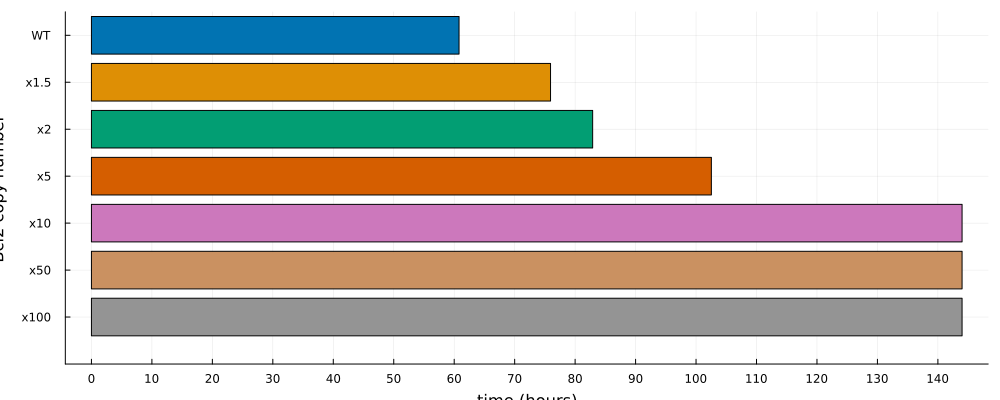

In [73]:
bar(T2D_res[:,2], orientation = :horizontal, size=(1000,400),legend=false,
                fillcolor=[cA[8],cA[6],cA[5],cA[4],cA[3],cA[2],cA[1],],
            yticks = (1:7, y), ylabel="Bcl2 copy number", ylim=(0,7.5))
s=string.(collect(0:10:140))
plot!(xticks = (0:(60*10):(60*140),s),xlabel="time (hours)",fmt = :png)